In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, f1_score, accuracy_score, make_scorer, ConfusionMatrixDisplay, precision_score, recall_score,mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


Cargo el Dataset modificado anteriormente para usarlo en los modelos

In [188]:
url = 'D:\App Exes\VS Code\Proyecto Final Data\Dataframe.csv'
df = pd.read_csv(url, sep = ',')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,posibilidad_stroke
0,9046,1,67,0,1,1,1,228,36,1,0,0,1,0,0,0,1,0,0,1
1,51676,0,61,0,0,1,0,202,30,1,0,0,0,1,0,0,0,1,0,1
2,31112,1,80,0,1,1,0,105,32,1,0,0,1,0,0,0,0,1,0,1
3,60182,0,49,0,0,1,1,171,34,1,0,0,1,0,0,0,0,0,1,1
4,1665,0,79,1,0,1,0,174,24,1,0,0,0,1,0,0,0,1,0,1


Teniendo en cuenta todos los Insight realizados e investigaciones sobre los ACV voy a generar etiquetas relacionando variables del DF

Primero una etiqueta que relacione la Edad, Glucosa en Sangre, BMI y el tipo de Trabajo.
Esto porque el estres de distintas situaciones de trabajo genera distintos niveles de BMI y glucosa en sangre.
La edad se usa como linea de tiempo mientras mas grande mas tiempo de trabajo.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


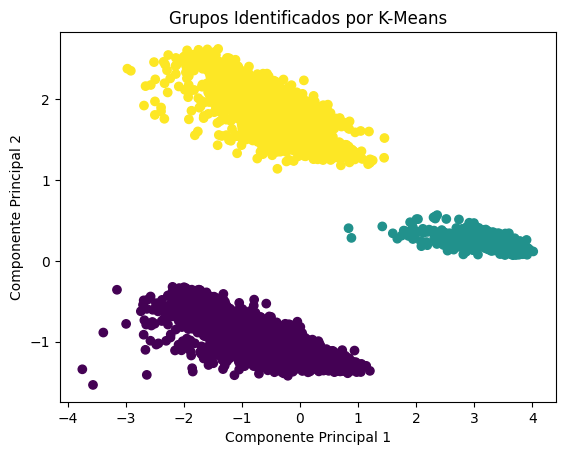

In [189]:
# Seleccionar las características para el análisis de clustering
X = df[['age', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['work_salud'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


Segundo una relacion entre la Edad, Glucosa en Sangre, BMI y el tipo de Fumador.
Esto porque el tipo de fumador genera distintos niveles de BMI y glucosa en sangre.
La edad se usa como linea de tiempo mientras mas grande mas se ven los efectos del tabaquismo.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


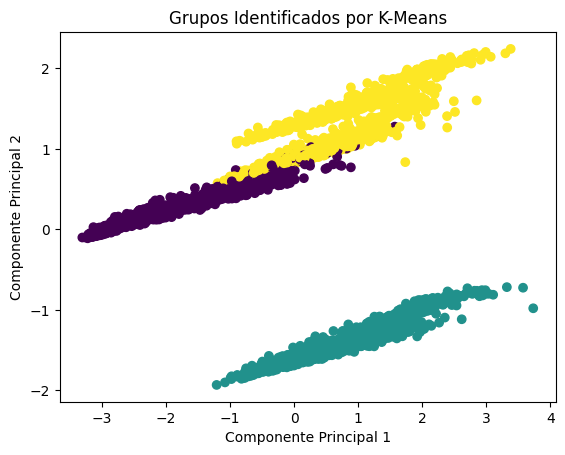

In [190]:
#Seleccionar las características para el análisis de clustering
X = df[['age', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=78)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['smoking_salud'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


Los ultimos 2 clusters los separo entre BMI y Glucosa en Sangre ya que asi se consigue una mejor distribucion de las variables, sino se genera un clsuter sin forma.

El tercero la relacion entre Hipertension, DCV y BMI.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


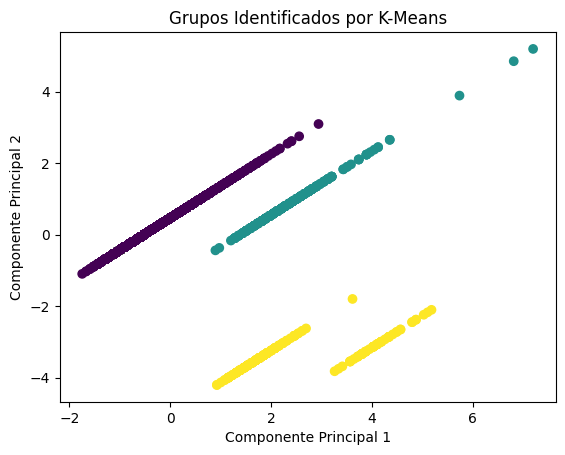

In [191]:
#Seleccionar las características para el análisis de clustering
X = df[['hypertension', 'heart_disease', 'bmi']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['bmi_hdcv'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


El cuarto la relacion entre Hipertension, DCV y Glucosa en sangre.

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


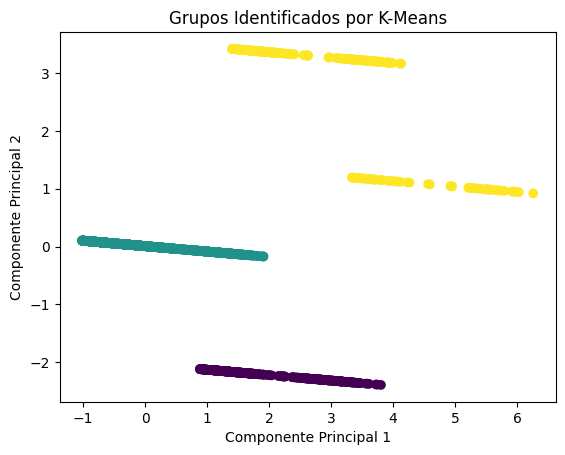

In [192]:
#Seleccionar las características para el análisis de clustering
X = df[['hypertension', 'heart_disease', 'avg_glucose_level']]

# Estandarizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para encontrar clusters
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=32)
clusters = kmeans.fit_predict(X_scaled)

# Agregar la columna de clusters al DataFrame original
df['avg_hdcv'] = clusters

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar los grupos en un scatterplot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Grupos Identificados por K-Means")
plt.show()


In [193]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,...,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,posibilidad_stroke,work_salud,smoking_salud,bmi_hdcv,avg_hdcv
0,9046,1,67,0,1,1,1,228,36,1,...,0,0,1,0,0,1,0,2,2,2
1,51676,0,61,0,0,1,0,202,30,1,...,0,0,0,1,0,1,2,1,0,1
2,31112,1,80,0,1,1,0,105,32,1,...,0,0,0,1,0,1,0,1,2,2
3,60182,0,49,0,0,1,1,171,34,1,...,0,0,0,0,1,1,0,2,0,1
4,1665,0,79,1,0,1,0,174,24,1,...,0,0,0,1,0,1,2,1,1,0


Genero mapa de correlatividad entre variables.

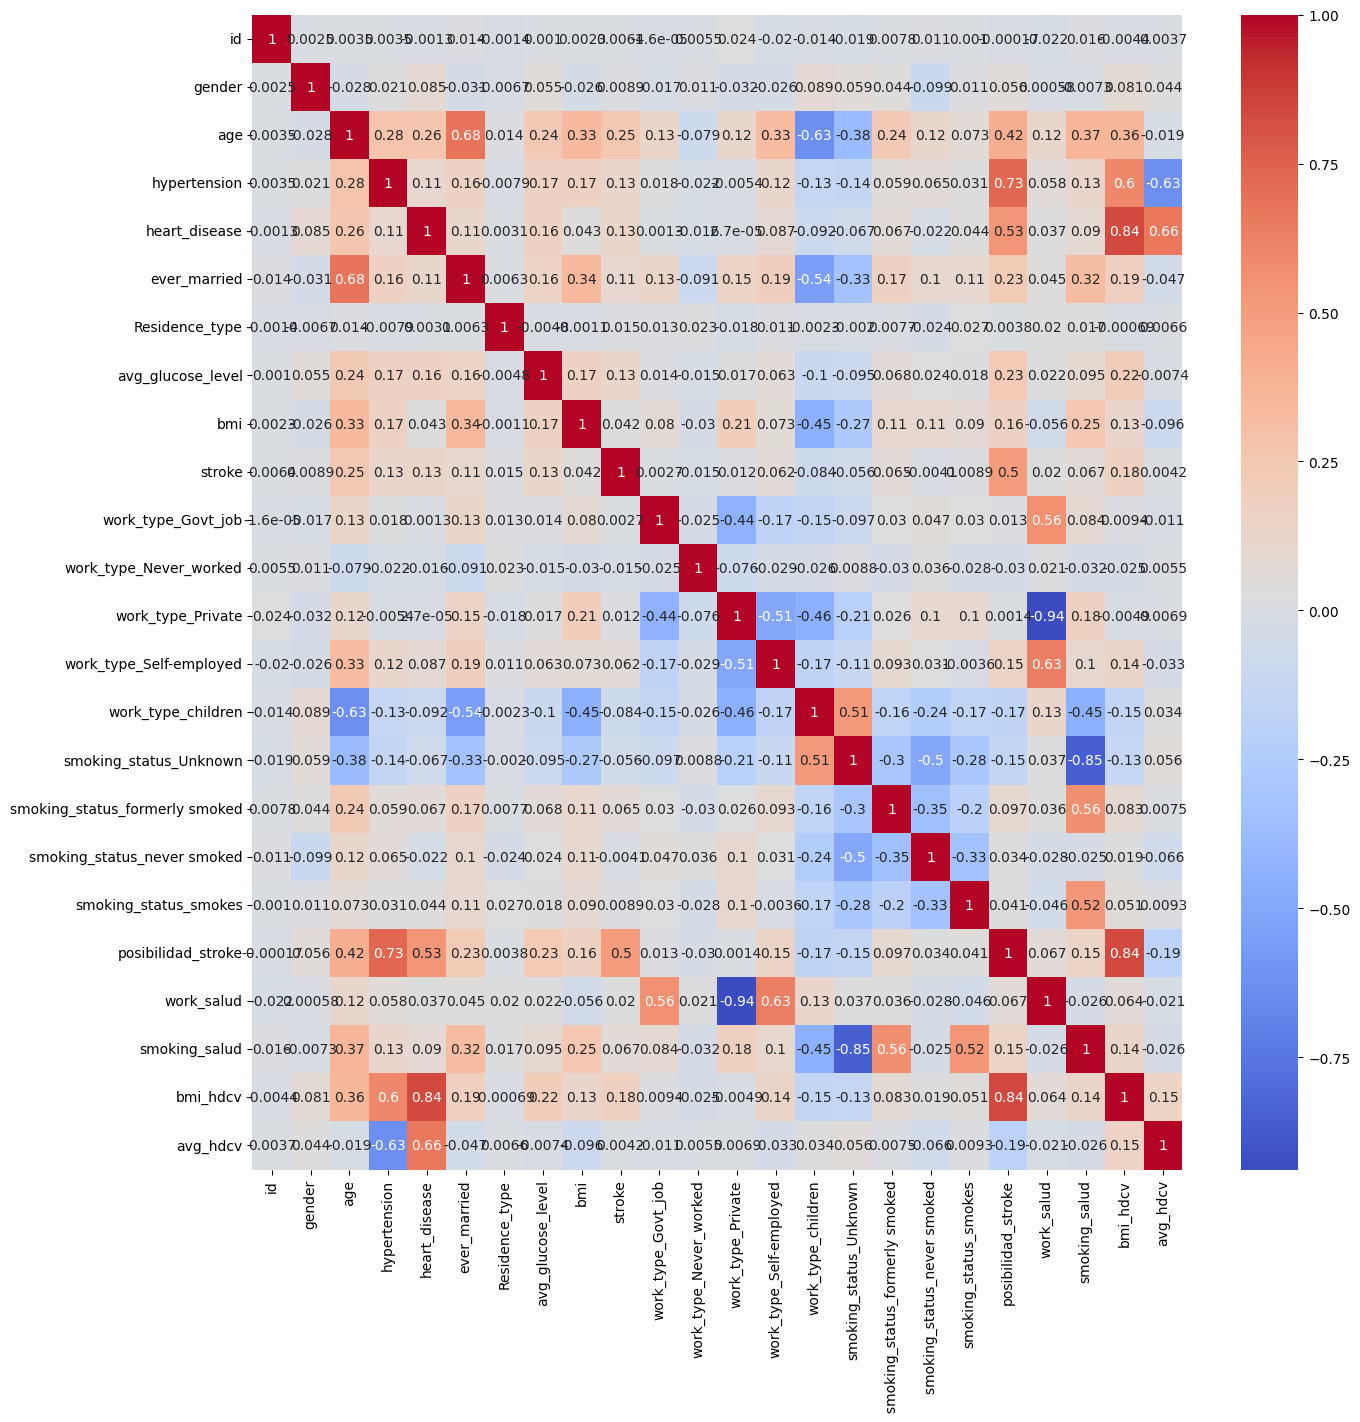

In [194]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

Empiezo con la creacion y entrenamiento de distintos modelos para la prediccion de la variable Stroke.
Teniendo en cuenta que mi objetivo es predecir una variable voy a usar modelos de entrenamiento supervisado
Regresion Logistica, KNN y Arbol de Desicion.

El primero un modelo de Regresion Logistica

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

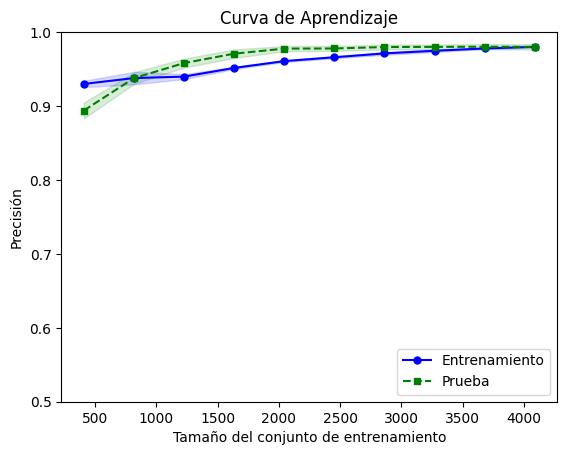

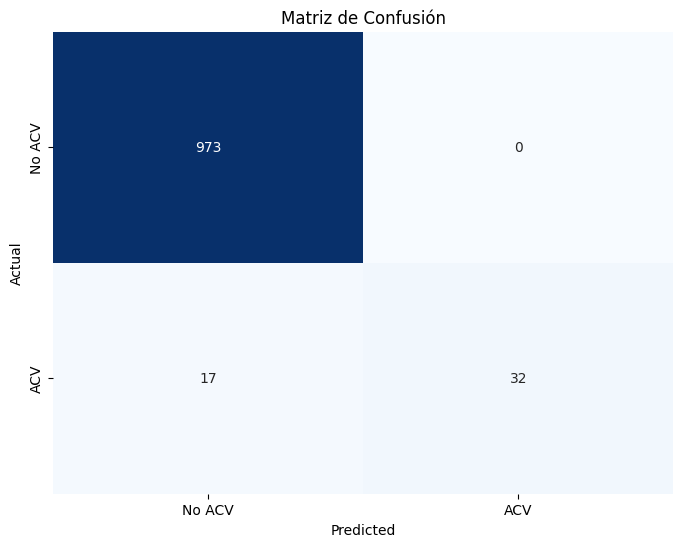

Precisión: 0.98
Precision: 1.00
Recall: 0.65
F1-score: 0.79
AUC-ROC: 0.83


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
# Seleccionar las características y la variable objetivo para df
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Dividir df en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Crear el modelo de regresión logística
reg = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
reg.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de entrenamiento y prueba
train_pred = reg.predict(X_train)
test_pred = reg.predict(X_test)

# Calcular la precisión para los datos de entrenamiento y prueba
train_acc = accuracy_score(y_train, train_pred)
test_acc = accuracy_score(y_test, test_pred)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(reg, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()

# Obtener las predicciones del modelo para los datos de prueba
y_pred = reg.predict(X_test)

# Crear la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Crear un heatmap para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.xticks([0.5, 1.5], ['No ACV', 'ACV'])
plt.yticks([0.5, 1.5], ['No ACV', 'ACV'])
plt.show()

# Calcular el F1-score para los datos de entrenamiento y prueba
train_f1 = f1_score(y_train, train_pred)
test_f1 = f1_score(y_test, test_pred)

reg.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = reg.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Imprimir las métricas
print(f'Precisión: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'AUC-ROC: {roc_auc:.2f}')

El segundo un modelo KNN

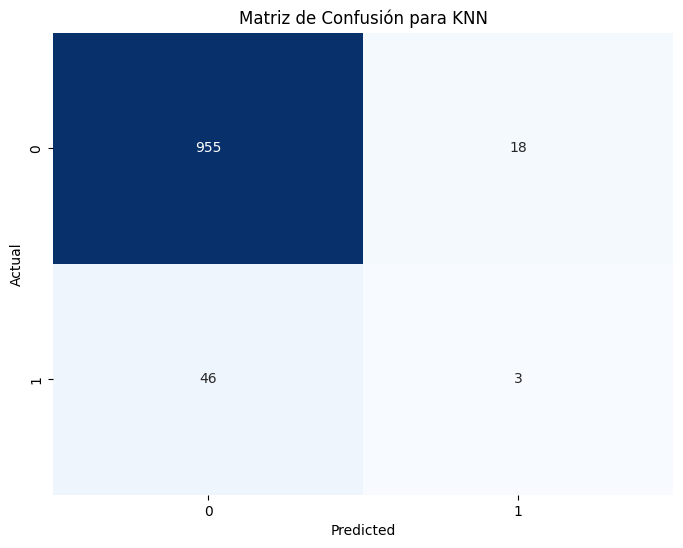

Precisión de KNN en datos de prueba: 0.9373776908023483


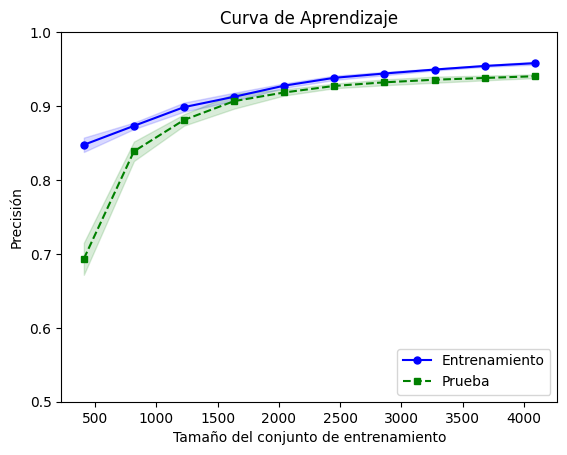

In [196]:
# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Predecir los valores de stroke para los datos de prueba
knn_test_pred = knn_model.predict(X_test)

# Calcular la precisión para los datos de prueba
knn_test_acc = accuracy_score(y_test, knn_test_pred)
# Crear la matriz de confusión para KNN
cm_knn = confusion_matrix(y_test, knn_test_pred)

# Crear el heatmap de la matriz de confusión para KNN
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión para KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("Precisión de KNN en datos de prueba:", knn_test_acc)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(knn_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Precisión')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.0])
plt.show()


El tercero un modelo de un Arbol de Clasificacion

MSE del Árbol de Regresión en datos de prueba: 0.015038595051819766
R² del Árbol de Regresión en datos de prueba: 0.6705419402624972


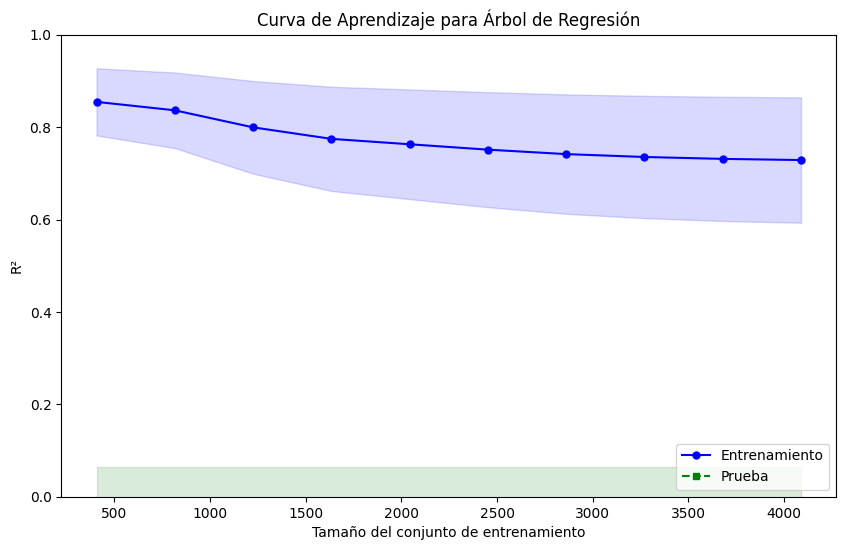

In [197]:
# Crear el modelo de Árbol de Regresión
tree_model = DecisionTreeRegressor(max_depth=3)

# Entrenar el modelo con los datos de entrenamiento
tree_model.fit(X_train, y_train)

# Predecir los valores para los datos de prueba
tree_test_pred = tree_model.predict(X_test)

# Calcular el MSE (Error Cuadrático Medio) para los datos de prueba
tree_mse = mean_squared_error(y_test, tree_test_pred)

# Calcular el coeficiente R²
tree_r2 = r2_score(y_test, tree_test_pred)

# Imprimir los resultados
print("MSE del Árbol de Regresión en datos de prueba:", tree_mse)
print("R² del Árbol de Regresión en datos de prueba:", tree_r2)

# Calcular la curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(tree_model, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Calcular las medias y desviaciones estándar de las puntuaciones de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Entrenamiento')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Prueba')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.title('Curva de Aprendizaje para Árbol de Regresión')
plt.legend(loc='lower right')
plt.ylim([0.0, 1.0])
plt.show()

Creo 4 modelos de Regresion Logistica para predecir el valor de cada cluster, Esto con el fin de que cuando ingrese valores para probar los modelos estos modelos ingresen el valor correspondientes.

In [198]:
# Datos de entrada
X = df[['age', 'avg_glucose_level', 'bmi', 'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children']]
y_cluster = df['work_salud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster, y_test_cluster = train_test_split(X, y_cluster, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster = LogisticRegression()
model_cluster.fit(X_train, y_train_cluster)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster = model_cluster.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster = accuracy_score(y_test_cluster, y_pred_cluster)

print("Precisión del modelo para work_salud:", accuracy_cluster)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Datos de entrada
X = df[['age', 'avg_glucose_level', 'bmi', 'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']]
y_cluster2 = df['smoking_salud']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster2, y_test_cluster2 = train_test_split(X, y_cluster2, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster2 = LogisticRegression()
model_cluster2.fit(X_train, y_train_cluster2)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster2 = model_cluster2.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster2 = accuracy_score(y_test_cluster2, y_pred_cluster2)

print("Precisión del modelo para smoking_salud:", accuracy_cluster2)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Datos de entrada
X = df[['hypertension', 'heart_disease', 'bmi']]
y_cluster3 = df['bmi_hdcv']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster3, y_test_cluster3 = train_test_split(X, y_cluster3, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster3 = LogisticRegression()
model_cluster3.fit(X_train, y_train_cluster3)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster3 = model_cluster3.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster3 = accuracy_score(y_test_cluster3, y_pred_cluster3)

print("Precisión del modelo para bmi_hdcv:", accuracy_cluster3)

#-------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Datos de entrada
X = df[['hypertension', 'heart_disease', 'avg_glucose_level']]
y_cluster4 = df['avg_hdcv']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train_cluster4, y_test_cluster4 = train_test_split(X, y_cluster4, test_size=0.2, random_state=83)

# Crear y entrenar modelos de regresión logística para cada cluster
model_cluster4 = LogisticRegression()
model_cluster4.fit(X_train, y_train_cluster4)

# Realizar predicciones en los conjuntos de prueba
y_pred_cluster4 = model_cluster4.predict(X_test)

# Calcular la precisión de las predicciones
accuracy_cluster4 = accuracy_score(y_test_cluster4, y_pred_cluster4)

print("Precisión del modelo para avg_hdcv:", accuracy_cluster4)

Precisión del modelo para work_salud: 1.0
Precisión del modelo para smoking_salud: 1.0
Precisión del modelo para bmi_hdcv: 1.0
Precisión del modelo para avg_hdcv: 1.0


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Hago cross validation a los 3 modelos (Regresion, KNN y Arbol)

In [199]:
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Definir los modelos
models = [reg, knn_model, tree_model]

# Definir una función para calcular el F1-score en lugar de accuracy
f1_scorer = make_scorer(f1_score)

for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring=f1_scorer)
    print(f"F1-score promedio para {model.__class__.__name__}: {scores.mean():.2f} (+/- {scores.std():.2f})")

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

F1-score promedio para LogisticRegression: 0.74 (+/- 0.05)
F1-score promedio para KNeighborsClassifier: 0.10 (+/- 0.03)
F1-score promedio para DecisionTreeRegressor: nan (+/- nan)


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python

De los 3 modelos utilizados para predecir stroke los modelos Regresion Logistica y el Arbol de Decision empatan con 75% y le sigue el KNN con 10%

Optimizo los hiperparametros con Gridsearch

In [200]:
# Seleccionar las características y la variable objetivo para df
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Dividir df en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)

# Define los hiperparámetros y sus valores posibles para cada modelo
param_grid_reg = {
    'C': [0.1, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

# Crea instancias de GridSearchCV para cada modelo
grid_reg = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_reg, scoring='accuracy', cv=5)
grid_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, scoring='accuracy', cv=5)
grid_tree = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=param_grid_tree, scoring='accuracy', cv=5)

# Ajusta los hiperparámetros para cada modelo
grid_reg.fit(X_train, y_train)
grid_knn.fit(X_train, y_train)
grid_tree.fit(X_train, y_train)

# Imprime los mejores hiperparámetros y las mejores puntuaciones para cada modelo
print("Mejores hiperparámetros para 'reg':", grid_reg.best_params_)
print("Mejor puntuación para 'reg':", grid_reg.best_score_)

print("Mejores hiperparámetros para 'knn_model':", grid_knn.best_params_)
print("Mejor puntuación para 'knn_model':", grid_knn.best_score_)

print("Mejores hiperparámetros para 'tree_model':", grid_tree.best_params_)
print("Mejor puntuación para 'tree_model':", grid_tree.best_score_)

C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Mejores hiperparámetros para 'reg': {'C': 10.0, 'penalty': 'l2'}
Mejor puntuación para 'reg': 0.9792074289322557
Mejores hiperparámetros para 'knn_model': {'n_neighbors': 7, 'weights': 'uniform'}
Mejor puntuación para 'knn_model': 0.947162527345258
Mejores hiperparámetros para 'tree_model': {'max_depth': 30, 'min_samples_split': 2}
Mejor puntuación para 'tree_model': 0.9659964148159675


C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 234, in __call__
    return self._score(
  File "C:\Users\lucas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_scorer.py", line 282, 

Utilizo metricas para comparar los modelos

R-cuadrado (R²): 

In [201]:
# Seleccionar las características y la variable objetivo para df
X = df[['gender', 'age', 'avg_glucose_level', 'bmi', 'posibilidad_stroke', 'work_salud', 'smoking_salud', 'bmi_hdcv', 'avg_hdcv']]
y = df['stroke']

# Dividir df en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83)
y_true = y_test

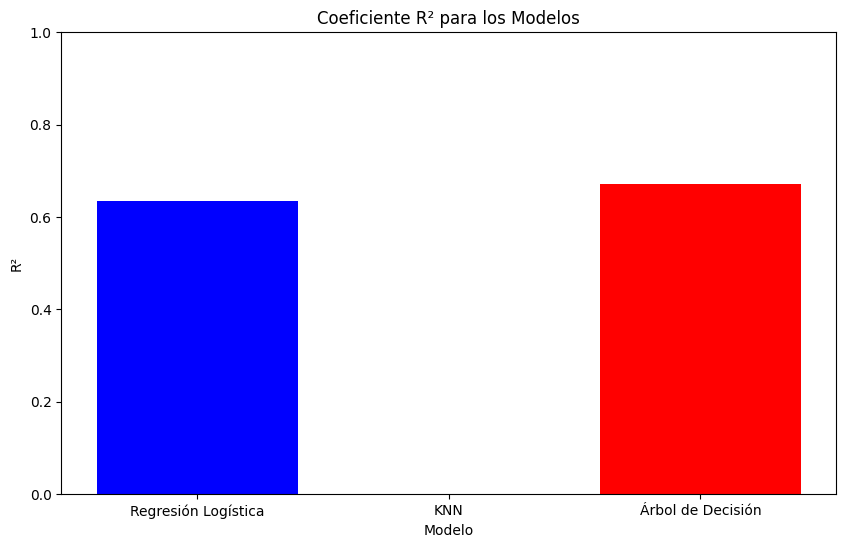

In [202]:
# Calcular el R² para los tres modelos
reg_test_pred = reg.predict(X_test)
knn_test_pred = knn_model.predict(X_test)
tree_test_pred = tree_model.predict(X_test)

reg_r2 = r2_score(y_test, reg_test_pred)
knn_r2 = r2_score(y_test, knn_test_pred)
tree_r2 = r2_score(y_test, tree_test_pred)

# Graficar el R² para los tres modelos
model_names = ['Regresión Logística', 'KNN', 'Árbol de Decisión']
r2_scores = [reg_r2, knn_r2, tree_r2]

plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.title('Coeficiente R² para los Modelos')
plt.ylim([0.0, 1.0])
plt.show()


El modelo de Arbol tiene mejor coeficiente R² que el de Regresion pero ambos tienen mejor que el modelo KNN

MAE (Error Absoluto Medio):

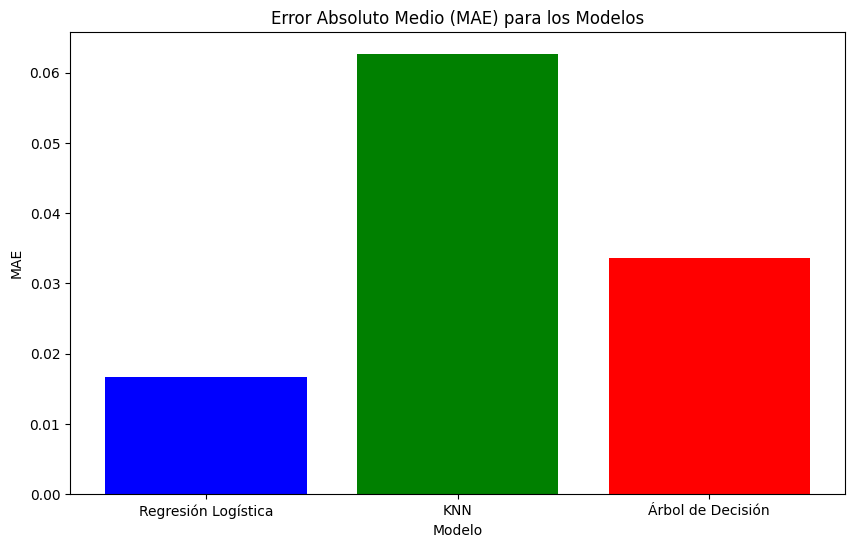

In [203]:
# Calcular el MAE para los tres modelos
reg_mae = mean_absolute_error(y_test, reg_test_pred)
knn_mae = mean_absolute_error(y_test, knn_test_pred)
tree_mae = mean_absolute_error(y_test, tree_test_pred)

# Graficar el MAE para los tres modelos
mae_scores = [reg_mae, knn_mae, tree_mae]

plt.figure(figsize=(10, 6))
plt.bar(model_names, mae_scores, color=['blue', 'green', 'red'])
plt.xlabel('Modelo')
plt.ylabel('MAE')
plt.title('Error Absoluto Medio (MAE) para los Modelos')
plt.show()

El modelo con menor MAE es el de Regresion seguido del Arbol y por ultimo de vuelta el modelo KNN

En conclusion el mejor modelo para predecir un ACV es el de Regresion Logistica, seguido por el de Arbol de Decision y nunca usar KNN.
Pero predecir un ACV es muy dificil de todas formas no solo por las tipo de variables sino que tambien por la falta de pacientes con ACV en el dataset, ya que los ACV son muy poco comunes y se desconoce la razon principal de estos mismos.